In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

In [8]:
y = np.where(y == 0, -1, 1)

In [10]:
class Perceptron:
  def __init__(self, learning_rate=0.01, epochs=1000):
    self.lr = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_features = X.shape[1]
    self.weights = np.zeros(n_features)
    self.bias = 0

    for epoch in range(self.epochs):
      for i, x_i in enumerate(X):
        linear_output = np.dot(x_i, self.weights) + self.bias
        y_pred = np.sign(linear_output)

        if y[i] != y_pred:
          self.weights += self.lr * y[i] * x_i
          self.bias += self.lr * y[i]

  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    return np.sign(linear_output)

In [11]:
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X,y)

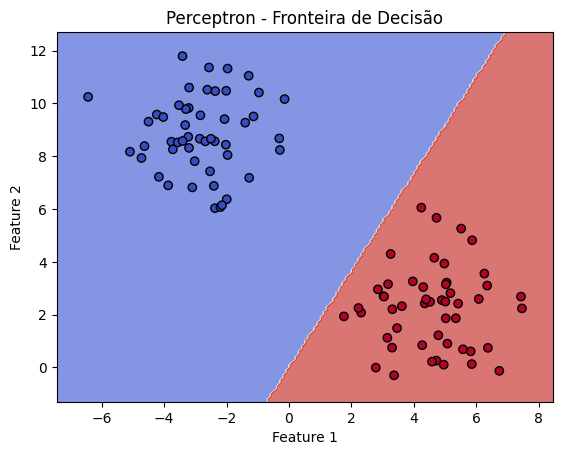

In [12]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.7, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.title("Perceptron - Fronteira de Decisão")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, perceptron)